In [1]:
import pandas as pd 
corona = pd.read_csv('data.csv')
corona.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,14/12/2020,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779
1,13/12/2020,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776
2,12/12/2020,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
3,11/12/2020,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266
4,10/12/2020,10,12,2020,202,16,Afghanistan,AF,AFG,38041757.0,Asia,6.968658


In [2]:
corona.drop(['dateRep','geoId','countryterritoryCode','continentExp',
'Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'], axis=1, inplace=True) 
corona.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61900 entries, 0 to 61899
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   day                      61900 non-null  int64  
 1   month                    61900 non-null  int64  
 2   year                     61900 non-null  int64  
 3   cases                    61900 non-null  int64  
 4   deaths                   61900 non-null  int64  
 5   countriesAndTerritories  61900 non-null  object 
 6   popData2019              61777 non-null  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 3.3+ MB


In [3]:
corona.isnull().sum()

day                          0
month                        0
year                         0
cases                        0
deaths                       0
countriesAndTerritories      0
popData2019                123
dtype: int64

In [4]:
corona.popData2019.fillna(0, inplace=True) 
corona.isna().any()

day                        False
month                      False
year                       False
cases                      False
deaths                     False
countriesAndTerritories    False
popData2019                False
dtype: bool

In [5]:
corona.isnull().sum()

day                        0
month                      0
year                       0
cases                      0
deaths                     0
countriesAndTerritories    0
popData2019                0
dtype: int64

In [6]:
corona['popData2019'] = (corona['popData2019']/ float(1000000)).round(2)
corona.sample(2)

,day,month,year,cases,deaths,countriesAndTerritories,popData2019
6498,14,8,2020,0,0,Bermuda,0.06
49389,10,7,2020,127,2,Senegal,16.30


In [7]:
corona.head()

,day,month,year,cases,deaths,countriesAndTerritories,popData2019
0,14,12,2020,746,6,Afghanistan,38.04
1,13,12,2020,298,9,Afghanistan,38.04
2,12,12,2020,113,11,Afghanistan,38.04
3,11,12,2020,63,10,Afghanistan,38.04
4,10,12,2020,202,16,Afghanistan,38.04


In [8]:
corona.rename({'popData2019':'Population', 
               'countriesAndTerritories':'Countries'},
              axis=1, inplace=True)
corona.sample(2)

,day,month,year,cases,deaths,Countries,Population
33971,1,4,2020,4,0,Liechtenstein,0.04
17976,22,5,2020,13,3,Equatorial_Guinea,1.36


In [9]:
corona.describe()

,day,month,year,cases,deaths,Population
count,61900.000000,61900.000000,61900.000000,61900.000000,61900.000000,61900.000000
mean,15.628934,7.067157,2019.998918,1155.147237,26.055460,40.906025
std,8.841582,2.954776,0.032882,6779.224479,131.227055,152.988066
min,1.000000,1.000000,2019.000000,-8261.000000,-1918.000000,0.000000
25%,8.000000,5.000000,2020.000000,0.000000,0.000000,1.290000
50%,15.000000,7.000000,2020.000000,15.000000,0.000000,7.170000
75%,23.000000,10.000000,2020.000000,273.000000,4.000000,28.520000
max,31.000000,12.000000,2020.000000,234633.000000,4928.000000,1433.780000


In [10]:
corona[corona['deaths']==4928]

,day,month,year,cases,deaths,Countries,Population
59243,16,4,2020,30148,4928,United_States_of_America,329.06


In [11]:
corona[corona['cases']==234633]

,day,month,year,cases,deaths,Countries,Population
59003,12,12,2020,234633,3343,United_States_of_America,329.06


In [12]:
corona[corona['deaths'].lt(0)]

,day,month,year,cases,deaths,Countries,Population
15113,6,7,2020,75,-3,Czechia,10.65
15114,5,7,2020,121,-1,Czechia,10.65
28207,3,10,2020,466,-5,Ireland,4.90
29271,25,6,2020,577,-31,Italy,60.36
31304,6,8,2020,218,-12,Kosovo,1.80
31909,24,8,2020,237,-443,Kyrgyzstan,6.42
52846,12,8,2020,3172,-2,Spain,46.94
52925,25,5,2020,-372,-1918,Spain,46.94


In [13]:
corona[corona['cases'].lt(0)]

,day,month,year,cases,deaths,Countries,Population
6311,20,5,2020,-209,0,Benin,11.80
10935,10,3,2020,-9,1,Cases_on_an_international_conveyance_Japan,0.00
16906,7,9,2020,-8261,3800,Ecuador,17.37
17024,12,5,2020,-50,18,Ecuador,17.37
17027,9,5,2020,-1480,50,Ecuador,17.37
17029,7,5,2020,-2461,49,Ecuador,17.37
20558,3,6,2020,-766,107,France,67.01
29276,20,6,2020,-148,47,Italy,60.36
30170,11,9,2020,-6,0,Jersey,0.11
30491,22,7,2020,-110,0,Jordan,10.10


In [14]:
corona.loc[corona['cases']< 0 , 'cases'] = corona.loc[corona['cases']< 0 , 'cases'] * -1 
corona.loc[corona['deaths']< 0 , 'deaths'] = corona.loc[corona['deaths']< 0 , 'deaths'] * -1 

In [15]:
corona[corona['deaths'].lt(0)]

,day,month,year,cases,deaths,Countries,Population


In [16]:
corona[corona['cases'].lt(0)]

,day,month,year,cases,deaths,Countries,Population


In [17]:
corona.describe()

,day,month,year,cases,deaths,Population
count,61900.000000,61900.000000,61900.000000,61900.000000,61900.000000,61900.000000
mean,15.628934,7.067157,2019.998918,1155.675864,26.133489,40.906025
std,8.841582,2.954776,0.032882,6779.134381,131.211538,152.988066
min,1.000000,1.000000,2019.000000,0.000000,0.000000,0.000000
25%,8.000000,5.000000,2020.000000,0.000000,0.000000,1.290000
50%,15.000000,7.000000,2020.000000,15.000000,0.000000,7.170000
75%,23.000000,10.000000,2020.000000,274.000000,4.000000,28.520000
max,31.000000,12.000000,2020.000000,234633.000000,4928.000000,1433.780000


In [18]:
corona.sort_values(by=['year', 'month', 'day'], ascending=[True, True, True], inplace=True, ignore_index=True) 

dmin = corona.loc[0].day
mmin = corona.loc[0].month
ymin = corona.loc[0].year 

dmax = corona.loc[corona.shape[0]-1].day
mmax = corona.loc[corona.shape[0]-1].month
ymax = corona.loc[corona.shape[0]-1].year 

from datetime import date 
d1 = date(ymax, mmax, dmax) 
d2 = date(ymin, mmin, dmin) 

corona_days = (d1 - d2).days 
print("days = ",corona_days)

corona_global_deaths_avg = corona['deaths'].sum()/corona_days
corona_global_cases_avg = corona['cases'].sum()/corona_days
print('corona_global_deaths_avg = {:.0f}'.format(corona_global_deaths_avg))
print('corona_global_cases_avg = {:.0f}'.format(corona_global_cases_avg))

days =  349
corona_global_deaths_avg = 4635
corona_global_cases_avg = 204975


<BarContainer object of 2 artists>

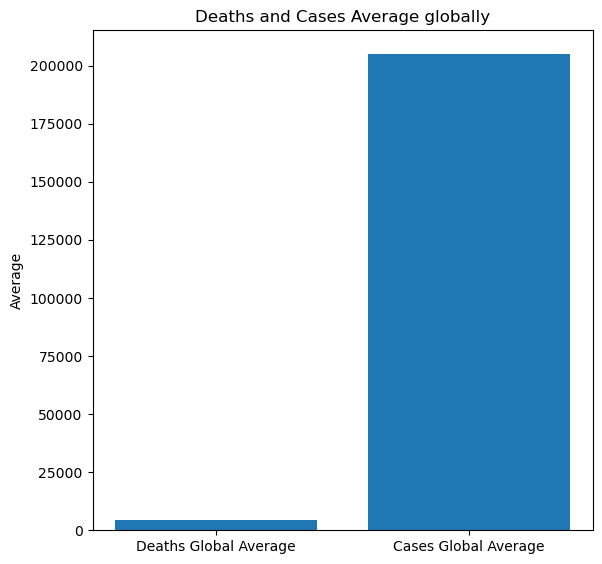

In [19]:
import matplotlib.pyplot as plt 
x = ['Deaths Global Average', 'Cases Global Average'] 
y = [corona_global_deaths_avg, corona_global_cases_avg]

fig = plt.figure(figsize=(5,5)) 
ax = fig.add_axes([.1,.1,1,1])

ax.set_title('Deaths and Cases Average globally') 
ax.set_ylabel('Average') 
ax.bar(x,y) 


In [20]:
avg_by_country = corona.groupby('Countries')[['deaths', 'cases']].agg([sum]).sort_values(by=('deaths', 'sum'), ascending=False)
avg_by_country = avg_by_country / corona_days
avg_by_country

,deaths,cases
,sum,sum
Countries,,
United_States_of_America,857.240688,46580.957020
Brazil,519.776504,19776.366762
India,410.759312,28321.203438
Mexico,326.512894,3581.787966
Italy,185.048711,5283.690544
...,...,...
Cambodia,0.000000,1.028653
Seychelles,0.000000,0.535817


<Axes: xlabel='Countries'>

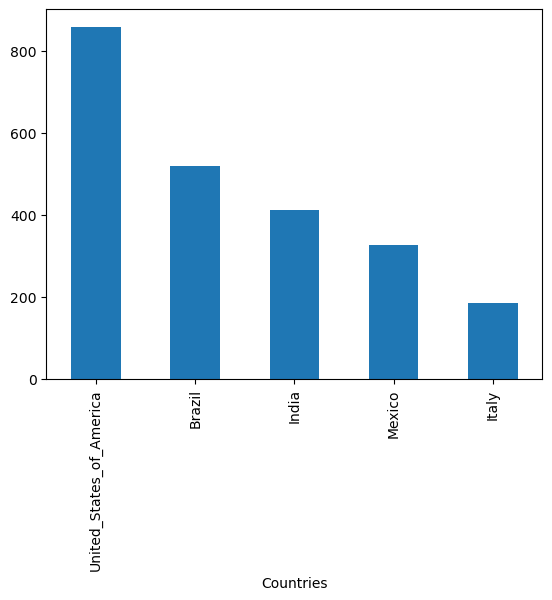

In [21]:
avg_by_country['deaths']['sum'].head(5).plot(kind='bar')

<Axes: xlabel='Countries'>

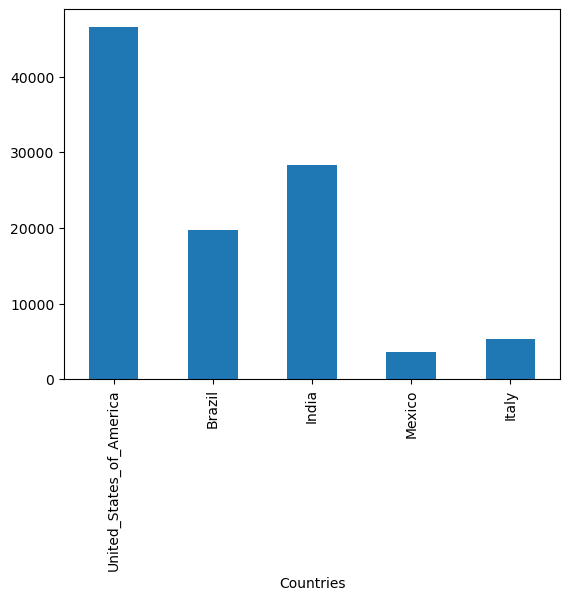

In [22]:
avg_by_country['cases']['sum'].head(5).plot(kind='bar') 

In [23]:
sum_by_month = corona[corona['year']==2020].groupby('month')[['deaths', 'cases']].agg([sum]).sort_values(by='month')
sum_by_month

,deaths,cases
,sum,sum
month,,
1,213,9799
2,2708,75422
3,35814,723756
4,189180,2341230
5,143978,2901710
6,134131,4251355
7,166203,7067744
8,179532,7966606


C:\Users\Admin\AppData\Local\Temp\ipykernel_12640\826078692.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(x)


([<matplotlib.patches.Wedge at 0x26217affd10>,
 [Text(1.0999999058878804, 0.0004550237954484424, '1'),
  Text(1.0999796256872296, 0.006695003583435564, '2'),
  Text(1.096402468403153, 0.08889109786403482, '3'),
  Text(0.955774385506939, 0.544513841889105, '4'),
  Text(0.43436617069113703, 1.0106067631671174, '5'),
  Text(-0.14714232734189037, 1.0901142763510678, '6'),
  Text(-0.7231982497295744, 0.8288451553746817, '7'),
  Text(-1.0818467517381078, 0.1990165966790333, '8'),
  Text(-0.9748414426369773, -0.5095921523311139, '9'),
  Text(-0.45108820274066697, -1.0032544210459253, '10'),
  Text(0.4839606132591579, -0.9878168478082463, '11'),
  Text(1.0526783222376048, -0.31916821566537806, '12')],
 [Text(0.5999999486661165, 0.0002481947975173322, '0.0'),
  Text(0.5999888867384888, 0.0036518201364193984, '0.2'),
  Text(0.5980377100380834, 0.04848605338038262, '2.2'),
  Text(0.5213314830037848, 0.29700755012133, '11.7'),
  Text(0.23692700219516563, 0.5512400526366095, '8.9'),
  Text(-0.08025

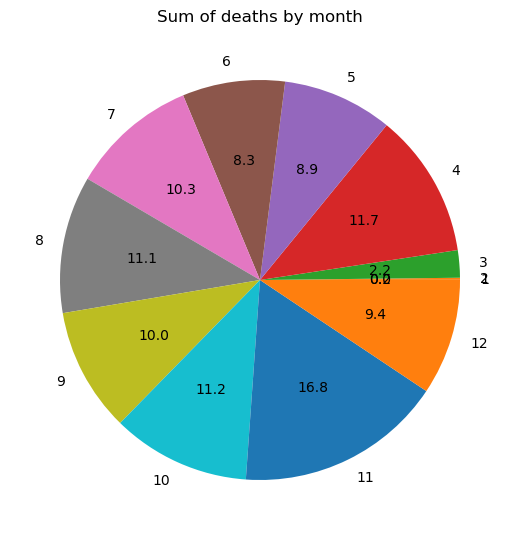

In [24]:
x = sum_by_month.index.tolist() 
y = sum_by_month['deaths']['sum']

fig = plt.figure(figsize=(5,5))
ax = fig.add_axes([.1,.1,1,1])
ax.set_title('Sum of deaths by month')
ax.set_yticklabels(x)
ax.pie(y, labels=x, autopct='%.1f') 

C:\Users\Admin\AppData\Local\Temp\ipykernel_12640\560487056.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(x)


([<matplotlib.patches.Wedge at 0x26217c03a10>,
 [Text(1.099999898147221, 0.00047336677501661845, '1'),
  Text(1.0999904227954427, 0.004590180639554417, '2'),
  Text(1.0991519510850438, 0.043185511759636155, '3'),
  Text(1.0834145847742676, 0.1902967091108032, '4'),
  Text(1.0113932234605005, 0.4325317878933041, '5'),
  Text(0.8282504421031148, 0.7238792752634897, '6'),
  Text(0.3828142595876259, 1.0312386933471698, '7'),
  Text(-0.33011119379742215, 1.0492981462528375, '8'),
  Text(-0.9411843958949697, 0.5693609864785443, '9'),
  Text(-1.0322493266303145, -0.3800806857382554, '10'),
  Text(0.06510230281835369, -1.0980718055608876, '11'),
  Text(1.0217106771927145, -0.4075626235444134, '12')],
 [Text(0.5999999444439387, 0.00025820005909997365, '0.0'),
  Text(0.5999947760702413, 0.002503734894302409, '0.1'),
  Text(0.5995374278645692, 0.023555733687074264, '1.0'),
  Text(0.5909534098768731, 0.103798204969529, '3.3'),
  Text(0.5516690309784548, 0.235926429759984, '4.1'),
  Text(0.45177296

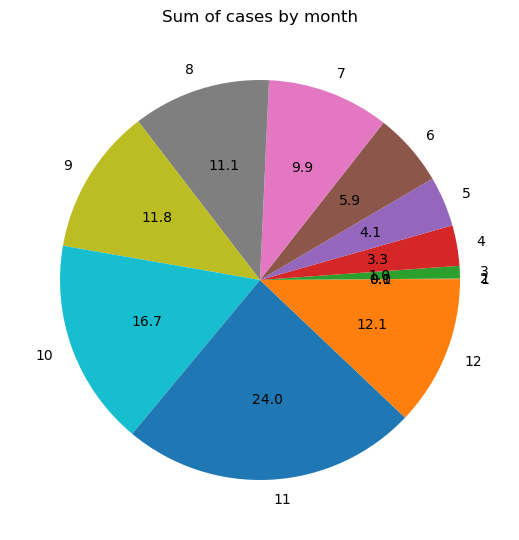

In [25]:
x = sum_by_month.index.tolist() 
y = sum_by_month['cases']['sum']

fig = plt.figure(figsize=(5,5))
ax = fig.add_axes([.1,.1,1,1])
ax.set_title('Sum of cases by month')
ax.set_yticklabels(x)
ax.pie(y, labels=x, autopct='%.1f') 

In [26]:
sum_by_month_country = corona[corona['year']==2020].groupby(['Countries', 'month'])[['deaths','cases']].agg([sum]).sort_index()
sum_by_month_country

deaths  cases
                     sum    sum
Countries   month              
Afghanistan 1          0      0
            2          0      1
            3          4    140
            4         56   1808
            5        189  12576
...                  ...    ...
Zimbabwe    8        143   3320
            9         32   1425
            10        14    525
            11        34   1588
            12        31   1296

[2220 rows x 2 columns]

In [27]:
 sum_by_month_country.loc[['China', 'Italy']]

deaths   cases
                   sum     sum
Countries month               
China     1        213    9687
          2       2624   69641
          3        472    2886
          4       1328    1703
          5          1     184
          6          3     652
          7         18    2709
          8         63    2406
          9         17     633
          10         0     771
          11         0     515
          12         0     207
Italy     1          0       3
          2         21     885
          3      11570  100851
          4      16091  101852
          5       5658   29073
          6       1466    8068
          7        388    6722
          8        345   21060
          9        398   44793
          10      2446  334663
          11     16583  937504
          12      9616  258534

In [28]:
corona_by_country = corona.groupby('Countries')
deaths_by_country_sum = corona_by_country['deaths'].sum()
deaths_by_country_sum = deaths_by_country_sum.sort_values(ascending=False).head(5)
deaths_by_country_sum

Countries
United_States_of_America    299177
Brazil                      181402
India                       143355
Mexico                      113953
Italy                        64582
Name: deaths, dtype: int64

C:\Users\Admin\AppData\Local\Temp\ipykernel_12640\3384259706.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x, rotation=60, horizontalalignment='center')


<BarContainer object of 5 artists>

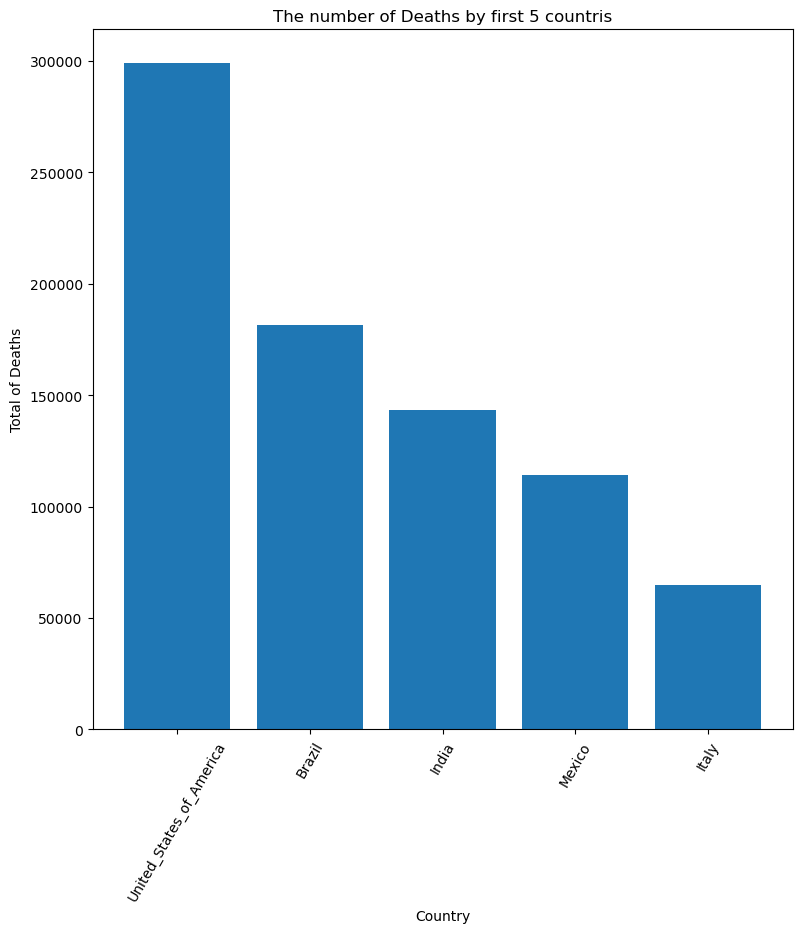

In [29]:
x = deaths_by_country_sum.index.tolist() 
y = deaths_by_country_sum

fig = plt.figure(figsize=(7,7))
ax = fig.add_axes([.1,.1,1,1])
ax.set_xlabel('Country')
ax.set_ylabel('Total of Deaths')
ax.set_title('The number of Deaths by first 5 countris')
ax.set_xticklabels(x, rotation=60, horizontalalignment='center')
ax.bar(x,y) 

In [30]:
corona_by_country = corona.groupby('Countries')
cases_by_country_sum = corona_by_country['cases'].sum()
cases_by_country_sum = cases_by_country_sum.sort_values(ascending=False).head(5)
cases_by_country_sum

Countries
United_States_of_America    16256754
India                        9884100
Brazil                       6901952
Russia                       2653928
France                       2378384
Name: cases, dtype: int64

C:\Users\Admin\AppData\Local\Temp\ipykernel_12640\1514636945.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x, rotation=60, horizontalalignment='center')


<BarContainer object of 5 artists>

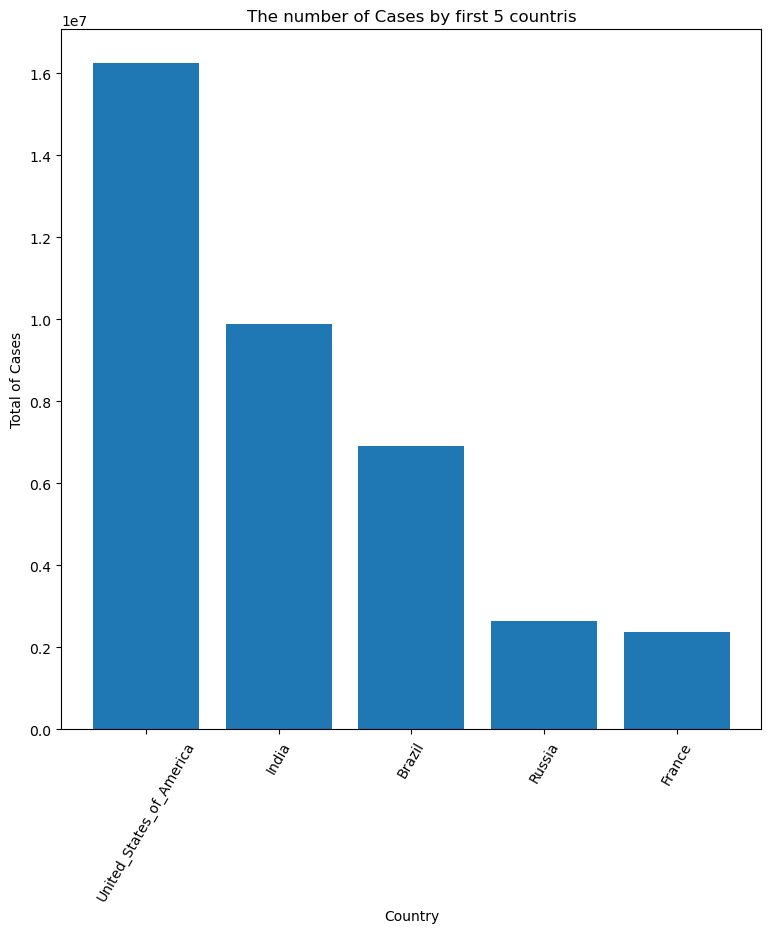

In [31]:
x = cases_by_country_sum.index.tolist() 
y = cases_by_country_sum

fig = plt.figure(figsize=(7,7))
ax = fig.add_axes([.1,.1,1,1])
ax.set_xlabel('Country')
ax.set_ylabel('Total of Cases')
ax.set_title('The number of Cases by first 5 countris')
ax.set_xticklabels(x, rotation=60, horizontalalignment='center')
ax.bar(x,y) 

In [50]:
corona_by_day_ser = corona[corona['Countries'] == 'France'].sort_values(by=['year', 'month', 'day']).reset_index(drop=True)


In [54]:
def time_series_by_country(country): 
    corona_by_day_ser = corona[corona['Countries'] == country].sort_values(by=['year', 'month', 'day']).reset_index(drop=True)
    
    x = corona_by_day_ser.index
    y = corona_by_day_ser[['deaths', 'cases']]
    
    max_deaths_v = y['deaths'].max()
    max_deaths_i = corona_by_day_ser['deaths'].idxmax() 
    
    max_cases_v = y['cases'].max()
    max_cases_i = corona_by_day_ser['cases'].idxmax() 
    
    fig = plt.figure()
    ax = fig.add_axes([.1,.1,1,1])
    
    ax.set_xlabel('Over time')
    ax.set_ylabel('Total of Deaths & Cases')
    ax.set_title('Sum of global deaths & cases over the time')
    ax.set_xticklabels(' ')
    ax.annotate('Max Deaths \n {} deaths'.format(max_deaths_v), xy=(max_deaths_i, max_deaths_v), xytext=( int(max_deaths_i)+5  ,int(max_deaths_v) + 50),
               arrowprops=dict(facecolor='red'))

    ax.annotate('Max Cases \n {} cases'.format(max_cases_v) , xy=(max_cases_i, max_cases_v), xytext=( int(max_cases_i)+5  ,int(max_cases_v) + 50),
               arrowprops=dict(facecolor='red'))

    ax.plot(x,y)

C:\Users\Admin\AppData\Local\Temp\ipykernel_12640\3139671373.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(' ')


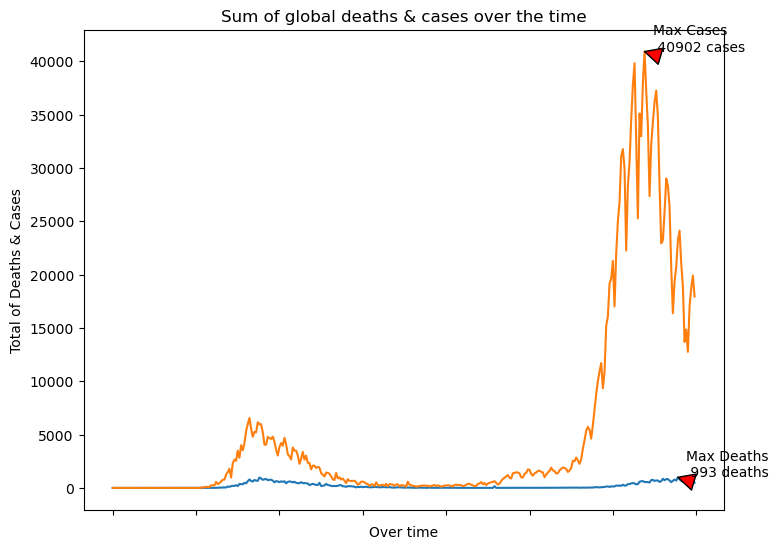

In [55]:
time_series_by_country('Italy')